In [1]:
#load the dataset

from keras.datasets.cifar10 import load_data

(trainX, trainy),(testX, testy) = load_data()

print(trainX.shape,trainy.shape)
print(testX.shape, trainy.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 204s 1us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (50000, 1)


In [6]:
import keras.datasets as k

print(k.__dict__.keys())

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__path__', '__file__', '__cached__', '__builtins__', 'absolute_import', 'mnist', 'imdb', 'reuters', 'cifar', 'cifar10', 'cifar100', 'boston_housing', 'fashion_mnist'])


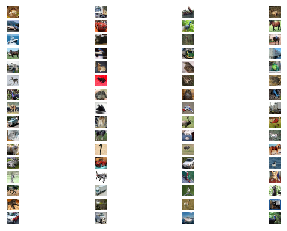

In [18]:
import matplotlib.pyplot as plt

for i in range(64):
    plt.subplot(16,4,1+i)
    plt.axis('off')
    plt.imshow(trainX[i])

plt.show()

In [36]:
def define_discriminator(in_shape = (32,32,3)):
    model = Sequential()
    #normal
    model.add(Conv2D(64,(3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    
    #downsample
    model.add(Conv2D(128,(3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #downsample
    model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    #compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [37]:
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint


from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

model = define_discriminator()

In [22]:
model.summary()
plot_model(model, to_file='discriminator_plot.png',show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)        

In [38]:
def load_real_samples():    
    (trainX,_),(_,_) = load_data()
    #convert from unsigned int to float
    X = trainX.astype('float32')
    # scale from [0,255] to [-1,1]
    X = (X - 127.5)/127.5
    return X

In [39]:
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    #generate 'real' class labesl(1)
    # creates an array of all ones
    y = ones((n_samples,1))
    return X,y

In [40]:
def generate_fake_samples(n_samples):
    # generate uniform random numbers in [0,1]
    X = rand(32 * 32 * 3 * n_samples)
    
    #update to have range [-1,1]
    X = -1 + X*2
    
    #reshape into a batch of color images
    X = X.reshape((n_samples,32, 32, 3))
    
    #generate 'fake' class labels (0)
    y = zeros((n_samples,1))
    return X, y
    


In [44]:
 def train_discriminator(model, dataset, n_iter=20, n_batch=128):
        half_batch = int(n_batch/2)
        for i in range(n_iter):
            # get real samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            
            #update discriminator on real samples
            _, real_acc = model.train_on_batch(X_real, y_real)
            
            #generate fake samples
            X_fake, y_fake = generate_fake_samples(half_batch)
            
            #update discriminator on fake samples
            _, fake_acc = model.train_on_batch(X_fake,y_fake)
            
            # summarize performance
            print(">" + str(i+1) + " real acc: " + str(real_acc *100) + " fake acc: " + str(fake_acc*100))

In [42]:
model = define_discriminator()

In [43]:
dataset = load_real_samples()

In [45]:
train_discriminator(model, dataset)

W0315 12:42:37.830494 10124 deprecation_wrapper.py:119] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



>1 real acc: 40.625 fake acc: 0.0
>2 real acc: 96.875 fake acc: 3.125
>3 real acc: 93.75 fake acc: 20.3125
>4 real acc: 93.75 fake acc: 54.6875
>5 real acc: 85.9375 fake acc: 82.8125
>6 real acc: 95.3125 fake acc: 100.0
>7 real acc: 90.625 fake acc: 100.0
>8 real acc: 89.0625 fake acc: 100.0
>9 real acc: 84.375 fake acc: 100.0
>10 real acc: 92.1875 fake acc: 100.0
>11 real acc: 92.1875 fake acc: 100.0
>12 real acc: 93.75 fake acc: 100.0
>13 real acc: 92.1875 fake acc: 100.0
>14 real acc: 100.0 fake acc: 100.0
>15 real acc: 100.0 fake acc: 100.0
>16 real acc: 100.0 fake acc: 100.0
>17 real acc: 98.4375 fake acc: 100.0
>18 real acc: 100.0 fake acc: 100.0
>19 real acc: 100.0 fake acc: 100.0
>20 real acc: 98.4375 fake acc: 100.0


The generator model is responsible for creating new, fake, but plausible small photographs of objects.

It does this by taking a point from the latent space as input and outputting a square color image.

The latent space is an arbitrarily defined vector space of Gaussian-distributed values, e.g. 100 dimensions. It has no meaning, but by drawing points from this space randomly and providing them to the generator model during training, the generator model will assign meaning to the latent points and, in turn, the latent space, until, at the end of training, the latent vector space represents a compressed representation of the output space, CIFAR-10 images, that only the generator knows how to turn into plausible CIFAR-10 images.

    Inputs: Point in latent space, e.g. a 100-element vector of Gaussian random numbers.
    Outputs: Two-dimensional square color image (3 channels) of 32 x 32 pixels with pixel values in [-1,1].

Note: we don’t have to use a 100 element vector as input; it is a round number and widely used, but I would expect that 10, 50, or 500 would work just as well.

Developing a generator model requires that we transform a vector from the latent space with, 100 dimensions to a 2D array with 32 x 32 x 3, or 3,072 values.

There are a number of ways to achieve this, but there is one approach that has proven effective on deep convolutional generative adversarial networks. It involves two main elements.

The first is a Dense layer as the first hidden layer that has enough nodes to represent a low-resolution version of the output image. Specifically, an image half the size (one quarter the area) of the output image would be 16x16x3, or 768 nodes, and an image one quarter the size (one eighth the area) would be 8 x 8 x 3, or 192 nodes.

With some experimentation, I have found that a smaller low-resolution version of the image works better. Therefore, we will use 4 x 4 x 3, or 48 nodes.

We don’t just want one low-resolution version of the image; we want many parallel versions or interpretations of the input. This is a pattern in convolutional neural networks where we have many parallel filters resulting in multiple parallel activation maps, called feature maps, with different interpretations of the input. We want the same thing in reverse: many parallel versions of our output with different learned features that can be collapsed in the output layer into a final image. The model needs space to invent, create, or generate.

Therefore, the first hidden layer, the Dense, needs enough nodes for multiple versions of our output image, such as 256.

In [55]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

def define_generator(latent_dim):
    model = Sequential()
    
    # foundations for a 4x4 image
    n_nodes = 256 * 4 * 4
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4,4,256)))
    
    # upsample to 8x8
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # upsample to 16x16
    model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #upsample to 32x32
    model.add(Conv2DTranspose(128,(4,4), strides= (2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #output layer
    model.add(Conv2D(3,(3,3), activation='tanh', padding='same'))
    
    return model    

In [56]:
latent_dim = 100

model = define_generator(latent_dim)

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 4096)              413696    
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 4096)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 128)         524416    
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 16, 128)       262272    
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 16, 16, 128)     

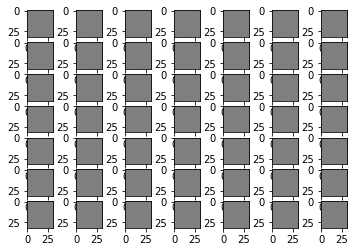

In [68]:
from numpy.random import randn

#generatin latent points as input to generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in latent space
    x_input = randn(latent_dim * n_samples)
    
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def generate_fake_samples_for_g(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    
    X = g_model.predict(x_input)
    
    y =zeros((n_samples, 1))
    
    return X, y

latent_dim = 100
model = define_generator(latent_dim)

n_samples =49
X, _ = generate_fake_samples_for_g(model, latent_dim, n_samples)

#scale pixel values from [-1,1] to [0,1]
X = (X +1)/ 2.0

#plot the damples
import matplotlib.pyplot as plot

for i in range(n_samples):
    plot.subplot(7,7,1+i)
    #plot.axis('off')
    plot.imshow(X[i])

plot.show()


Specifically, a new GAN model can be defined that stacks the generator and discriminator such that the generator receives as input random points in the latent space and generates samples that are fed into the discriminator model directly, classified, and the output of this larger model can be used to update the model weights of the generator.

Only the discriminator is concerned with distinguishing between real and fake examples, therefore the discriminator model can be trained in a standalone manner on examples of each, as we did in the section on the discriminator model above.

The generator model is only concerned with the discriminator’s performance on fake examples. Therefore, we will mark all of the layers in the discriminator as not trainable when it is part of the GAN model so that they can not be updated and overtrained on fake examples.

When training the generator via this logical GAN model, there is one more important change. We want the discriminator to think that the samples output by the generator are real, not fake. Therefore, when the generator is trained as part of the GAN model, we will mark the generated samples as real (class 1)

In [69]:
def define_gan(g_model, d_model):
    # make discriminator non trainable
    d_model.trainable = False
    #connect them
    model = Sequential()
    # add generator
    model.add(g_model)
    # add discriminator
    model.add(d_model)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [72]:
def standalone_discriminator(in_shape=(32,32,3)):
    model = Sequential()
    # normal
    model.add(Conv2D(64,(3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    
    #downsample
    model.add(Conv2D(128, (3,3),strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    #compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


In [73]:
latent_dim =100

d_model = standalone_discriminator()
g_model = define_generator(latent_dim)

gan_model = define_gan(g_model, d_model)

gan_model.summary()


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_25 (Sequential)   (None, 32, 32, 3)         1466115   
_________________________________________________________________
sequential_24 (Sequential)   (None, 1)                 372865    
Total params: 1,838,980
Trainable params: 1,466,115
Non-trainable params: 372,865
_________________________________________________________________


In [ ]:
!conda install pydot
!conda install graphviz

In [81]:
import matplotlib.pyplot as pyplot

# create and save plot of generated image
def save_plot(examples, epoch, n=7):
    examples = (examples + 1)/2.0
    for i in range(n * n):
        pyplot.subplot(n,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i])
    
    filename = 'generated_plot_' + str(epoch + 1) + '.png'
    pyplot.savefig(filename)
    pyplot.close()
    
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
    X_real, y_real = generate_real_samples(dataset, n_samples)
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    x_fake,y_fake = generate_faker_samples(g_model, latent_dim, n_samples)
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    
    print('>Accuracy real: ' + str(acc_real*100) + ', fake: ' + str(acc_fake*100))
    
    save_plot(x_fake, epoch)
    filename = 'generator_model ' + str(epoch + 1)
    g_model.save(filename)
    

In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs =200, n_batch=128):
    bat_per_epo = int(dataset.shape[0]/n_batch)
    half_batch = int(n_batch/2)
    
    # enumerate over epochs
    for i in range(n_epochs):
        # enumerate over training set
        for j in range(bat_per_epo):
            
            # get randomly selected real image
            X_real, y_real = generate_real_samples(dataset, half_batch)
            
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            
            # generate fake samples
            X_fake, y_fake = generate_faker_samples(g_model, latent_dim, half_batch)
            
            #update discriminator model weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            
            #preparepoints for input to generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            
            # update the generator via the discriminator  error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            
            print("statistics: ", i+1,j+1,bat_per_epo, d_loss1, d_loss2, g_loss)
            
            #if(i+1) % 10 == 0:
            #    summarize_performance(i, g_model, d_model, dataset, latent_dim)
        
    
    
    

In [84]:
def generate_faker_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y

In [ ]:
latent_dim =100
d_model = standalone_discriminator()
    
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
    
dataset = load_real_samples()
    
train(g_model, d_model, gan_model, dataset, latent_dim)